# Missing values replaced with 0

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("city_hour.csv")
data.isnull().sum()

In [2]:
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


<AxesSubplot:>

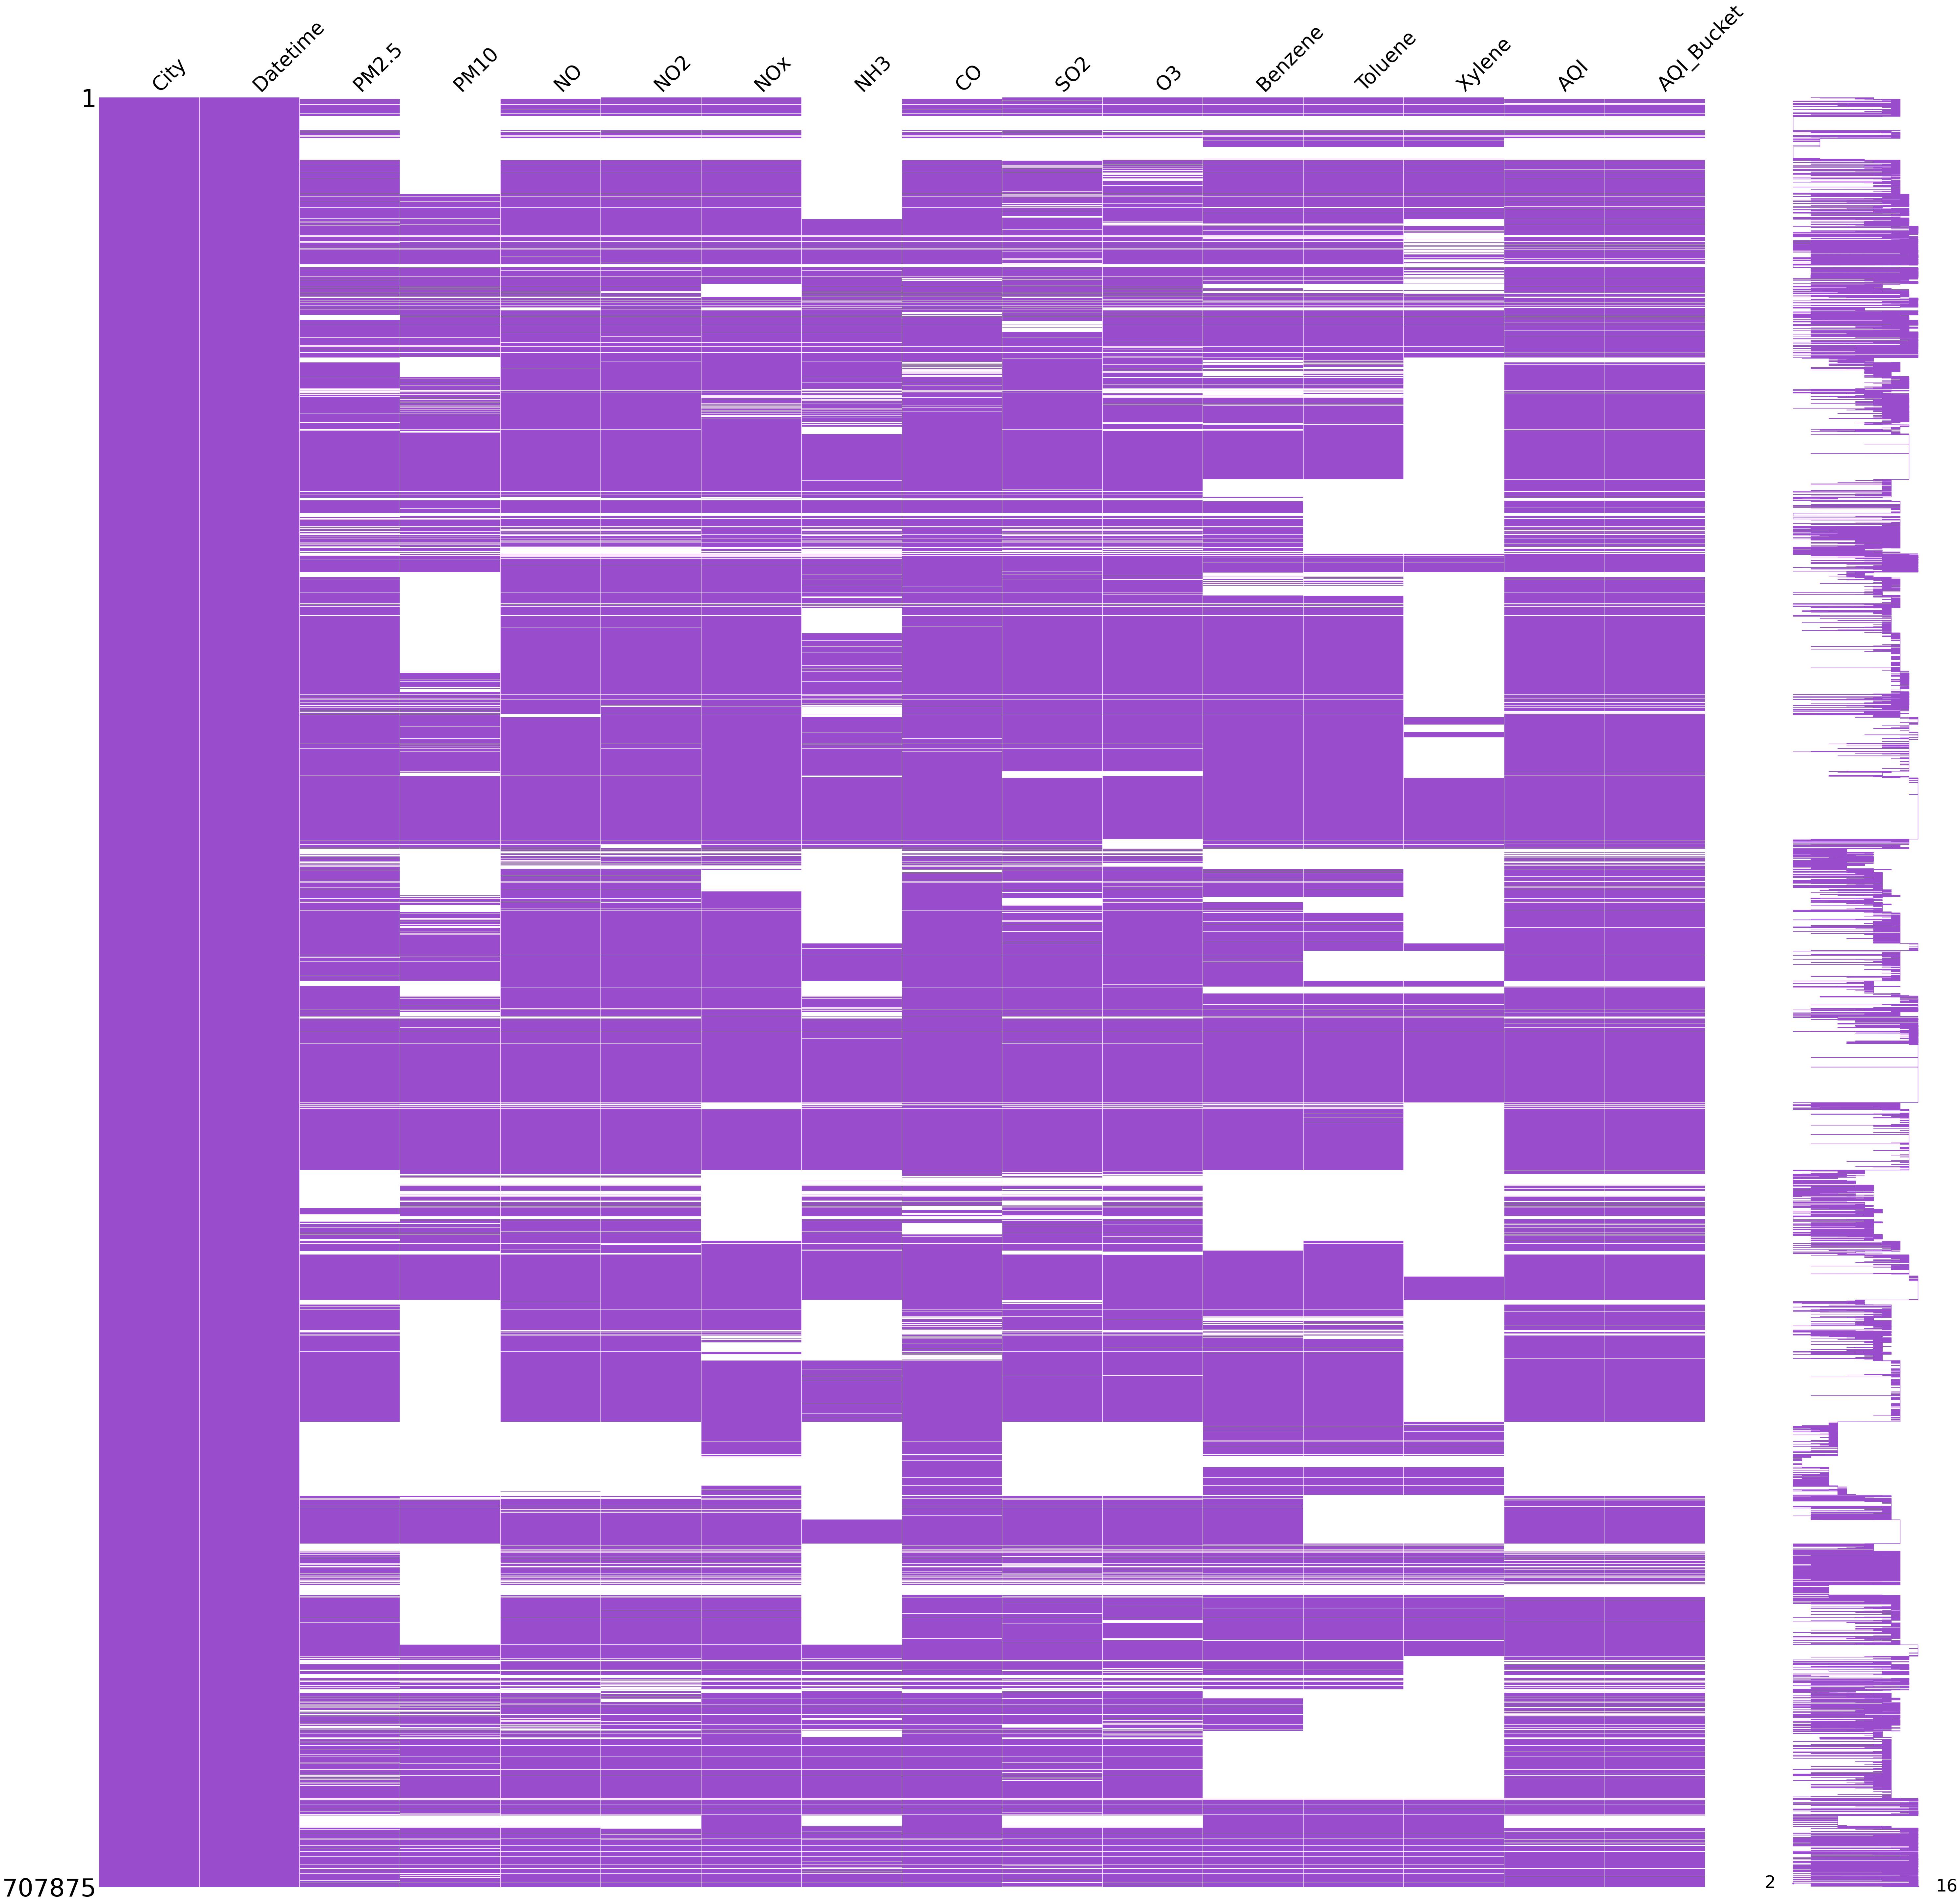

In [3]:
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

In [4]:
data = data.fillna(0)

<AxesSubplot:>

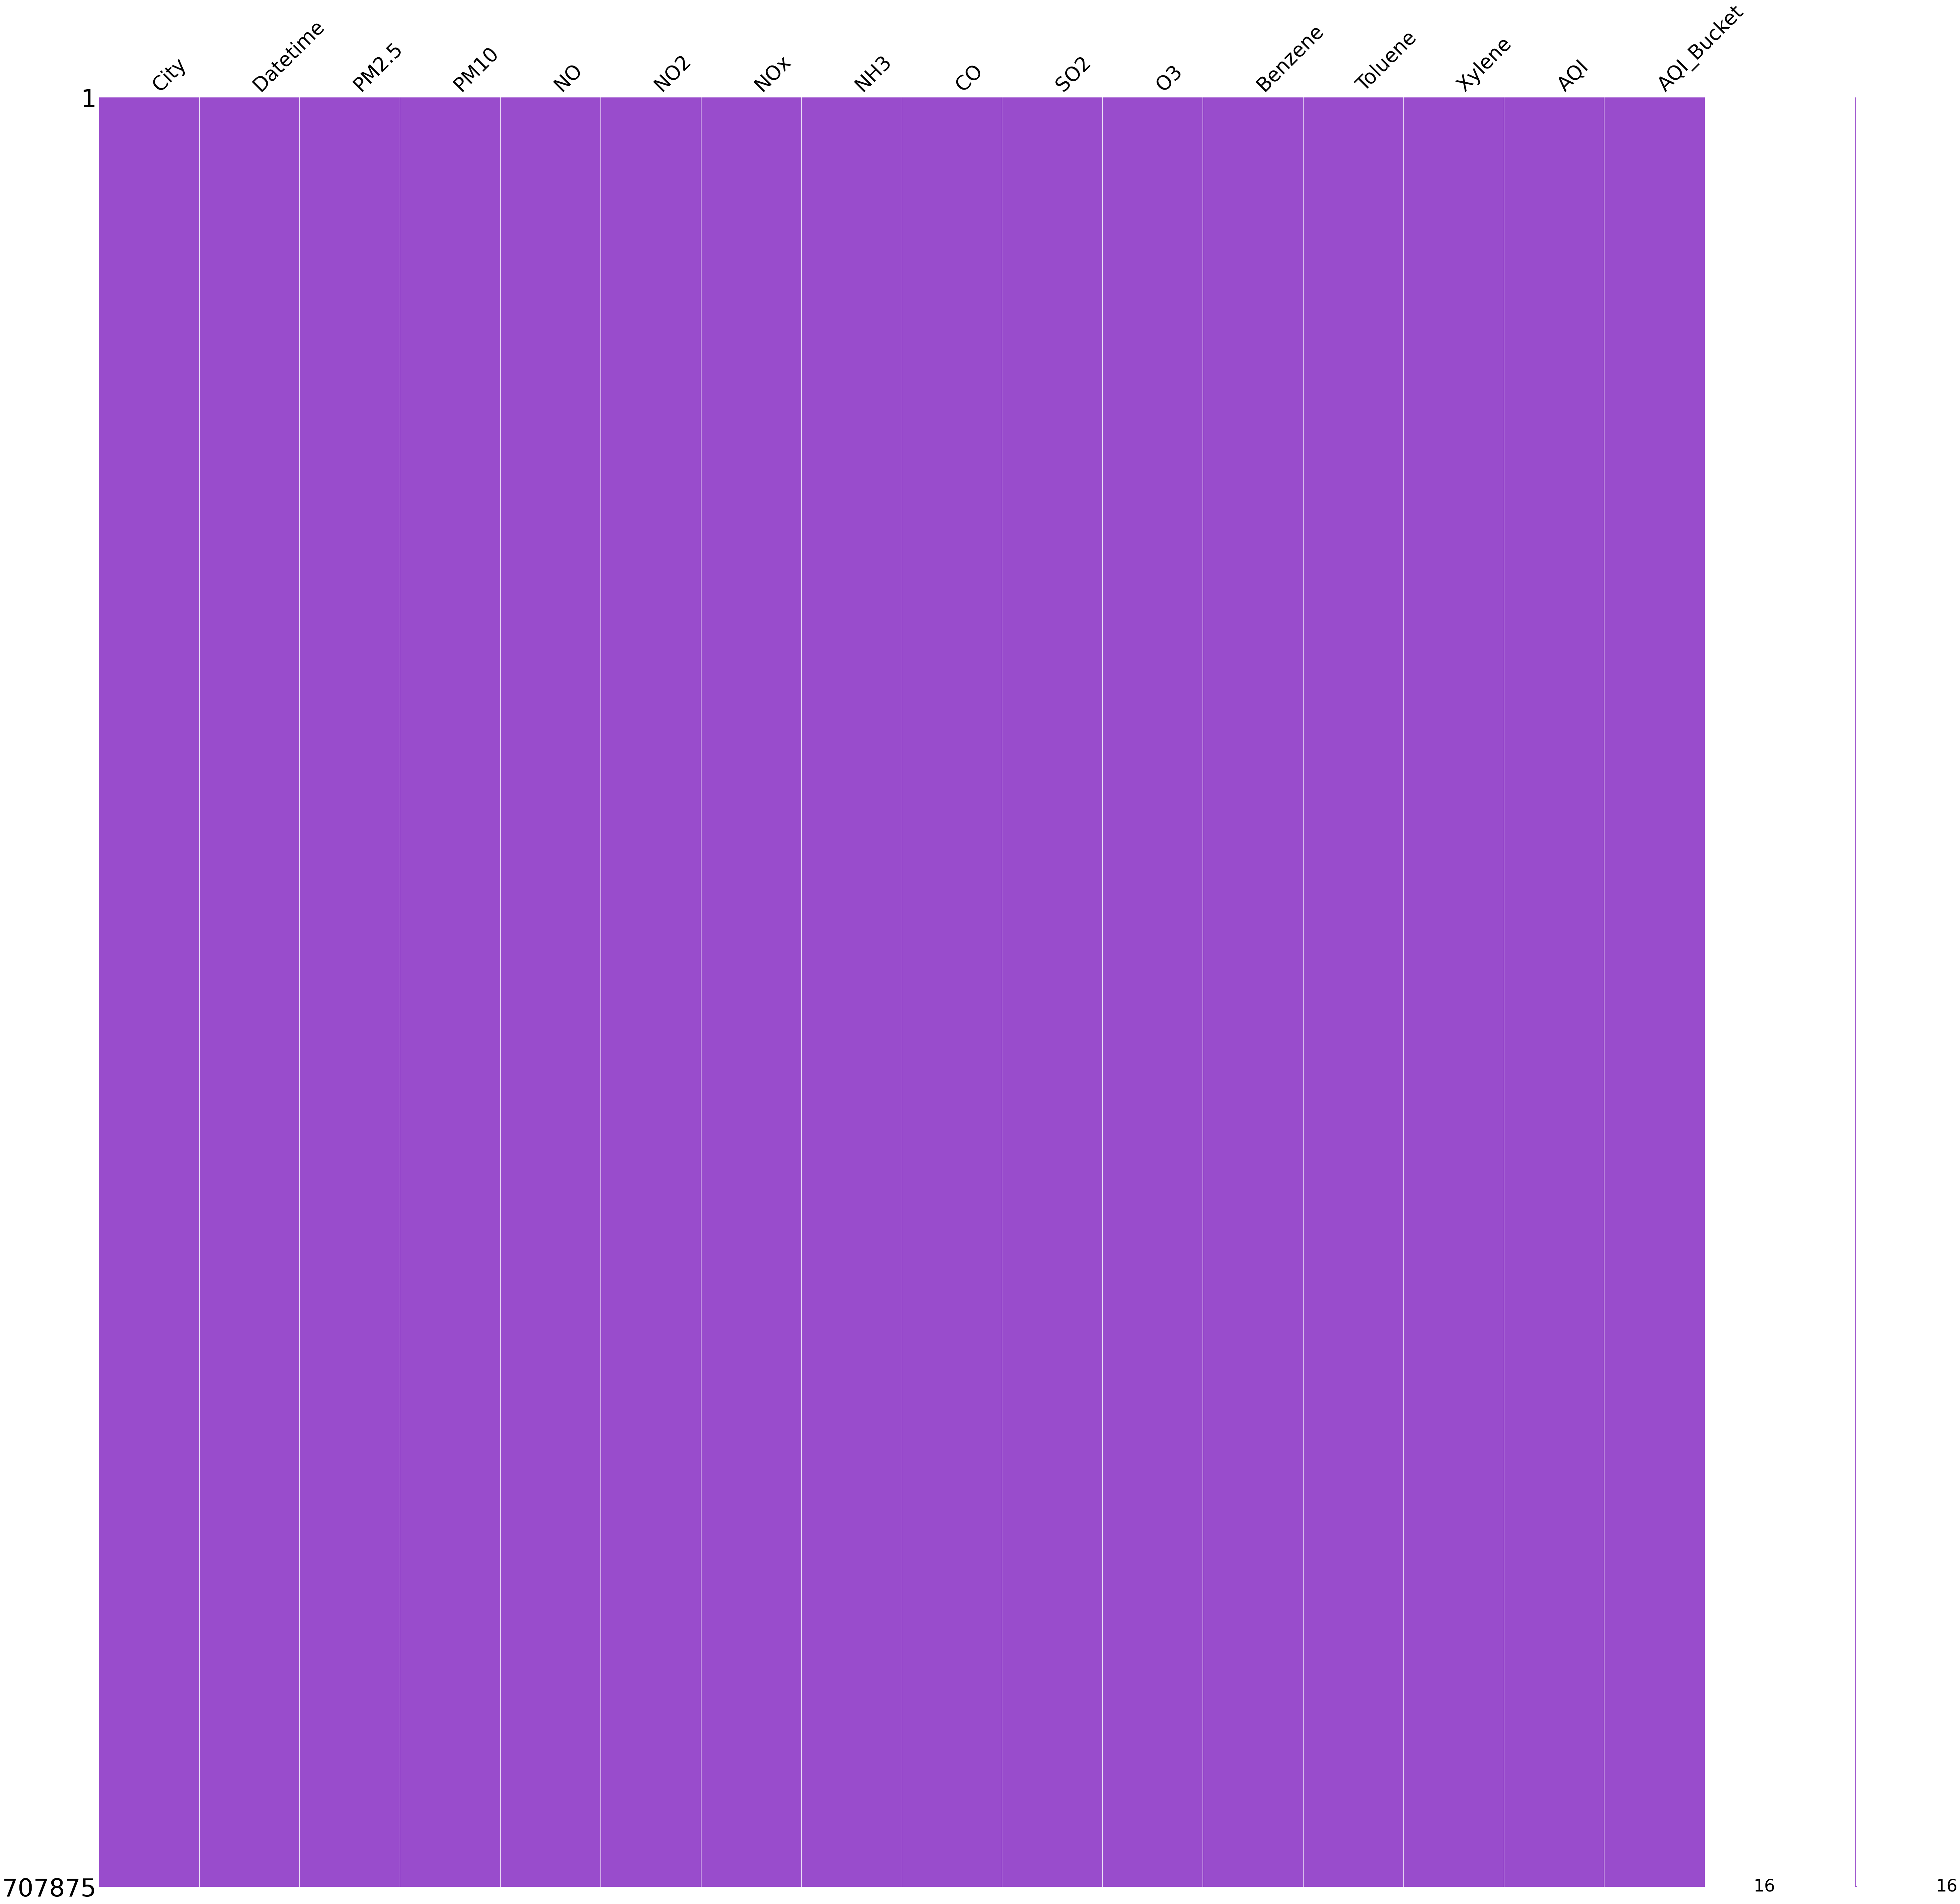

In [5]:
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

In [7]:
X=data.iloc[:,2:-2]
y=data.iloc[:,-2]
X=np.array(X)
y=np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df[:10]

,Actual,Predicted
0,51.0,55.282702
1,0.0,28.770605
2,67.0,82.364535
3,101.0,73.603069
4,88.0,123.875941
5,19.0,42.878040
6,56.0,125.151168
7,0.0,194.858240
8,116.0,194.068739
9,0.0,57.925309


In [8]:
from sklearn.metrics import mean_squared_error 
y_pred=np.array(y_pred)
y_test=np.array(y_test)
# Calculation of Mean Squared Error (MSE) 
mse=mean_squared_error(y_pred,y_test) 
print(mse)

12952.914807702751


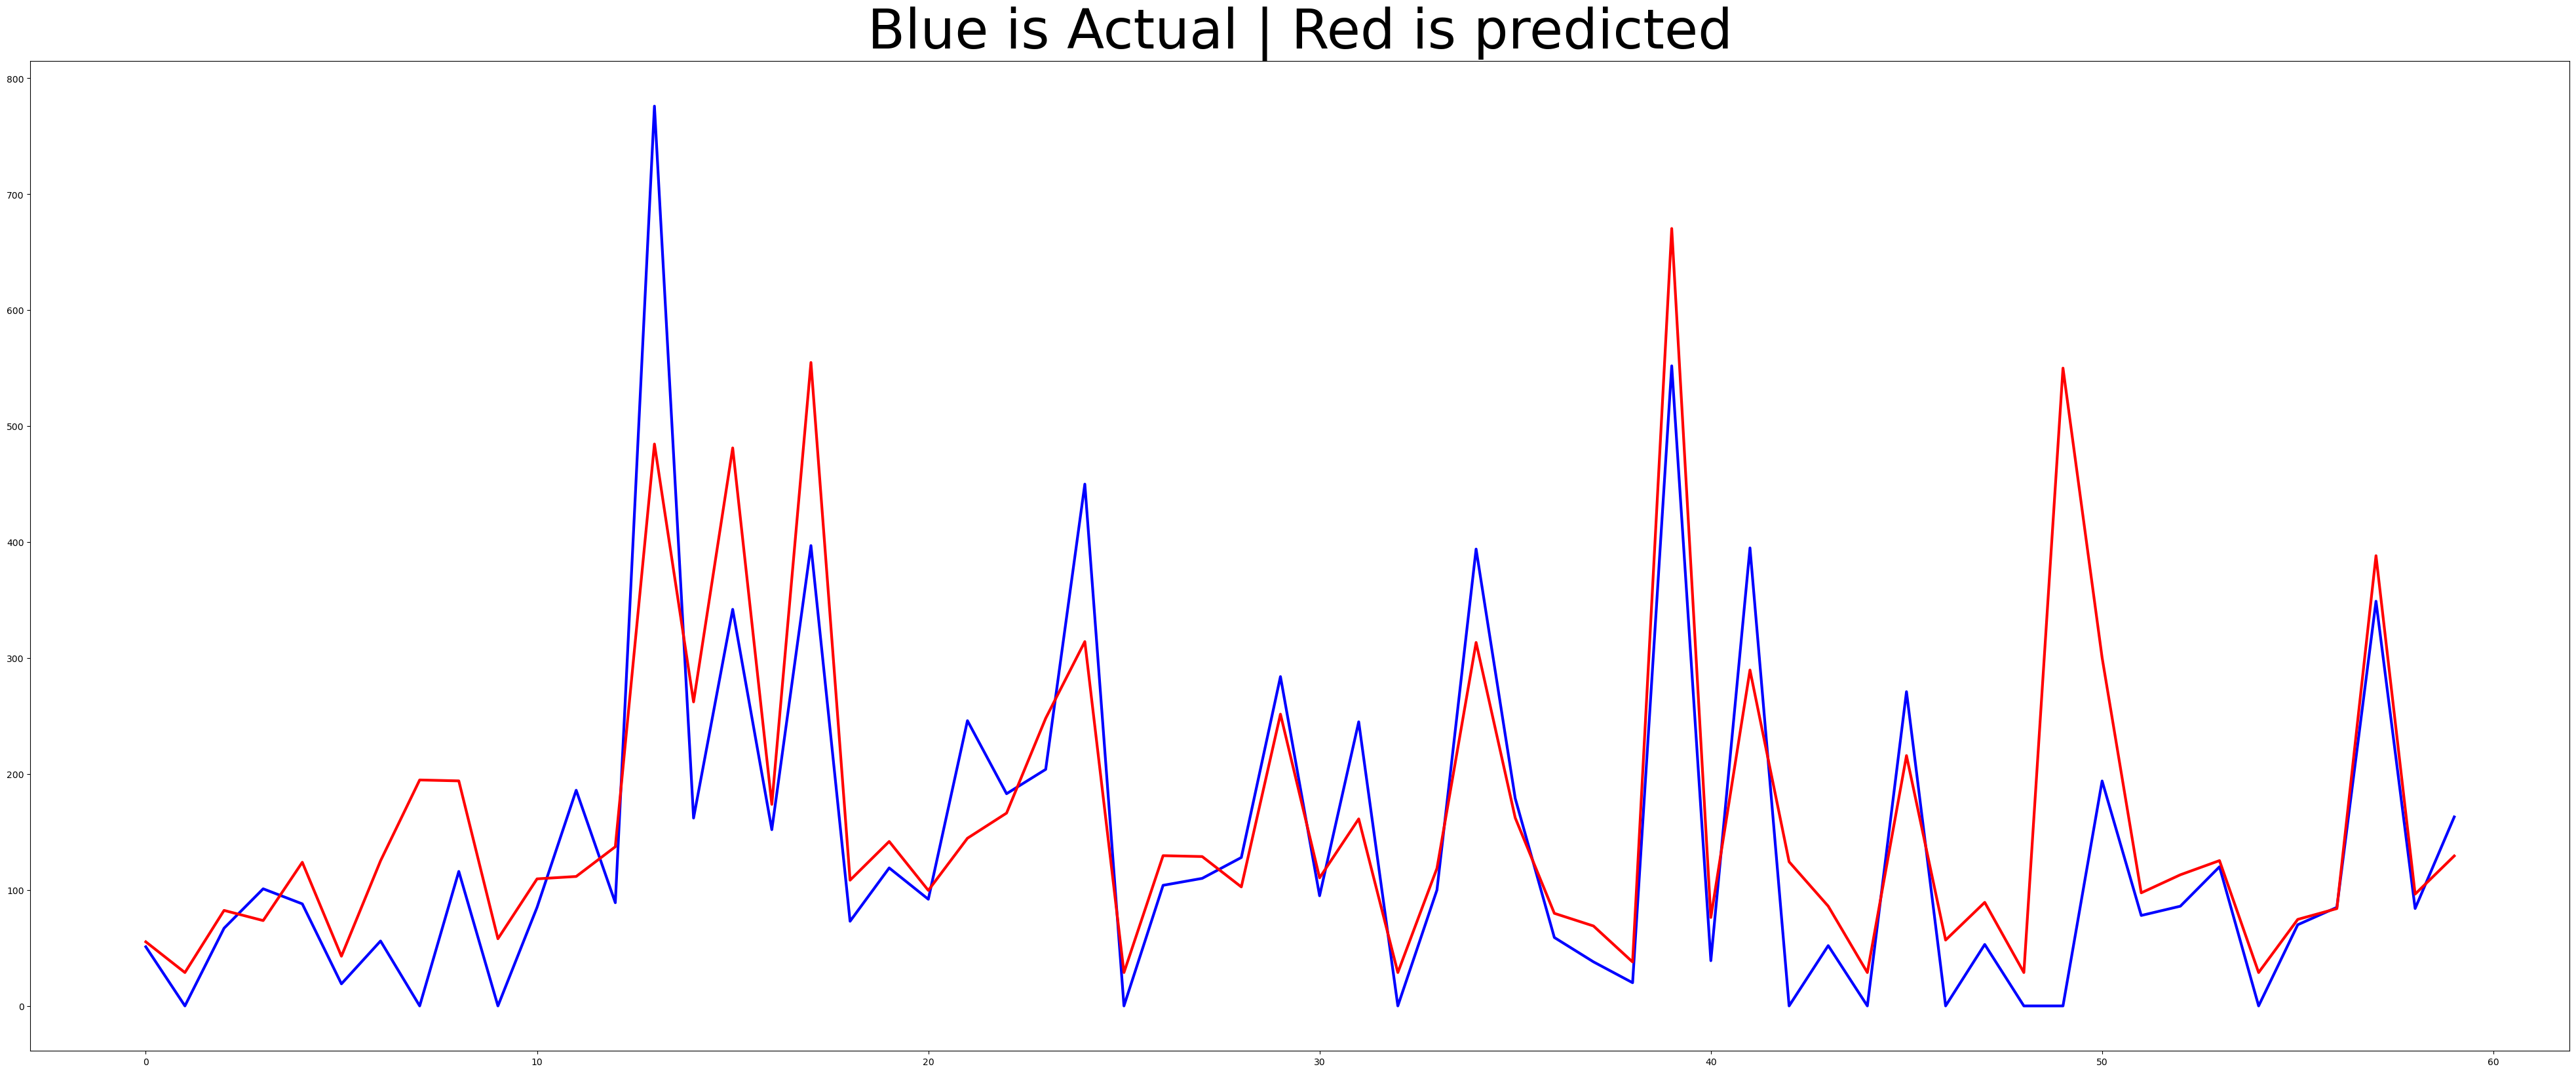

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20), dpi=100, facecolor='w', edgecolor='k')
plt.title("Blue is Actual | Red is predicted",size=60)
plt.plot(y_test[:60],'b', linewidth=3)
plt.plot(y_pred[:60],'r', linewidth=3)
plt.show()

# Missing values dropped

In [10]:
data = pd.read_csv("city_hour.csv")
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [11]:
data=data.drop(columns=['Xylene','City','Datetime'])

<AxesSubplot:>

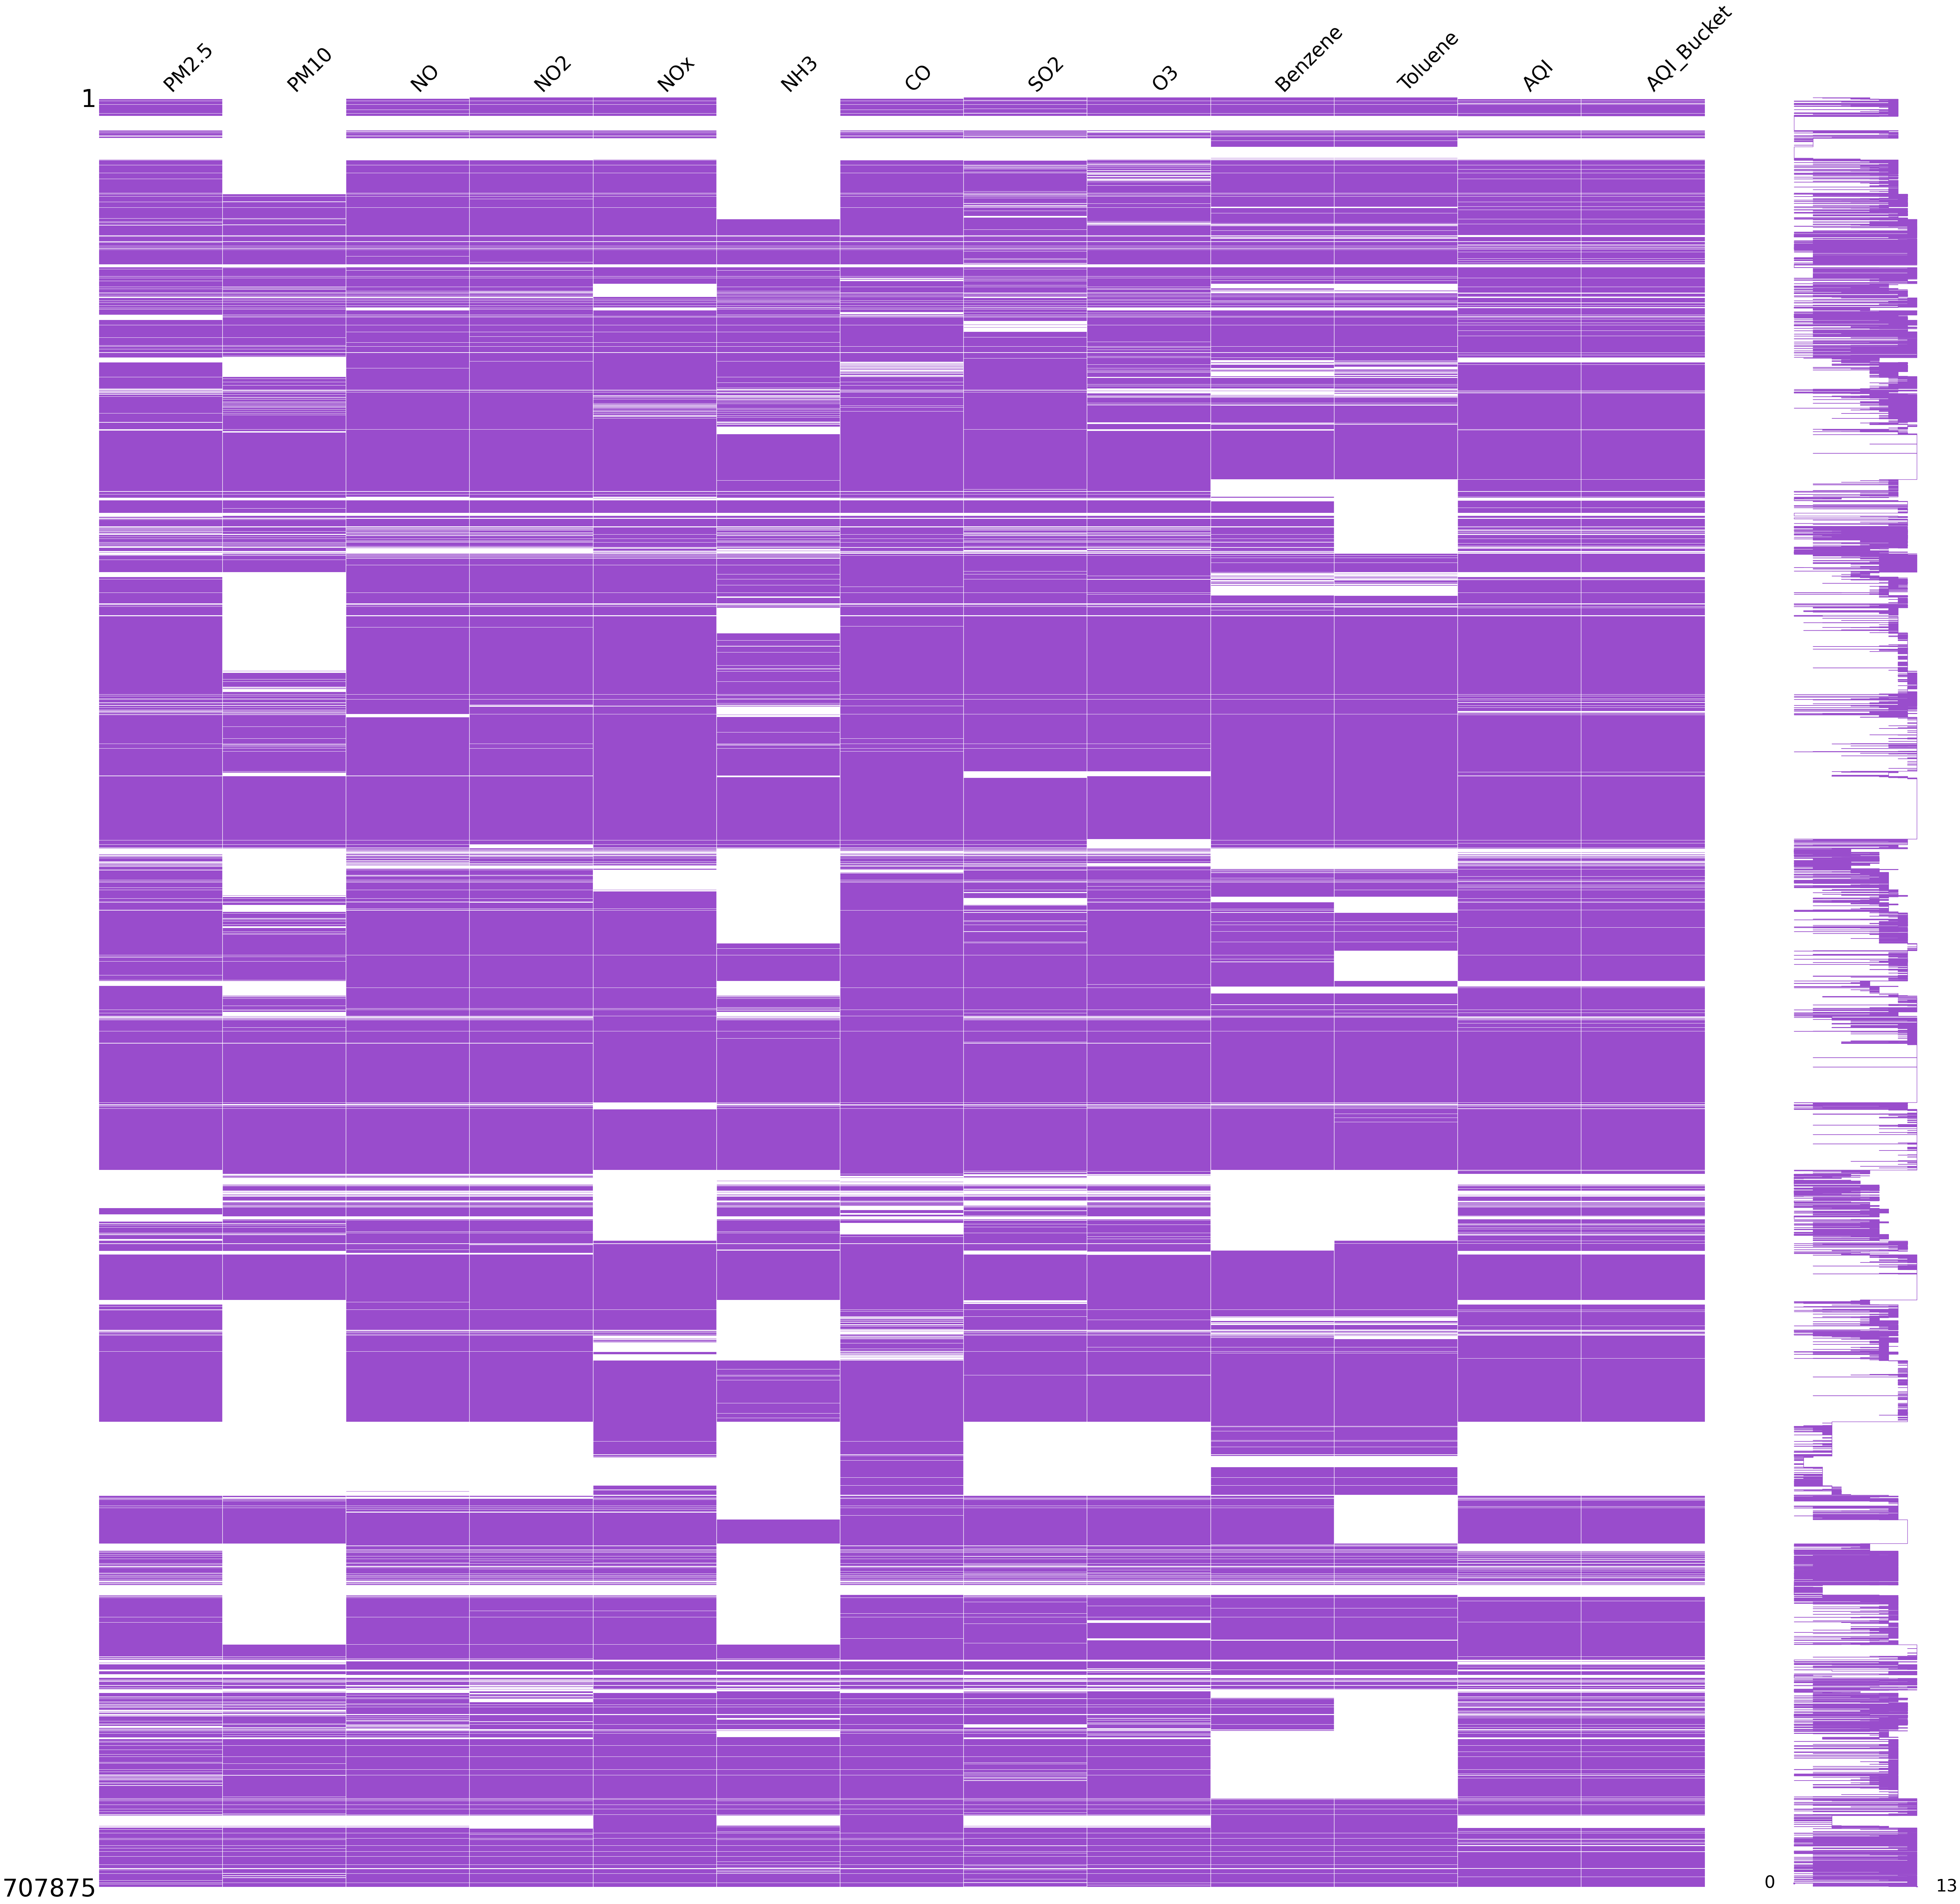

In [12]:
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

<AxesSubplot:>

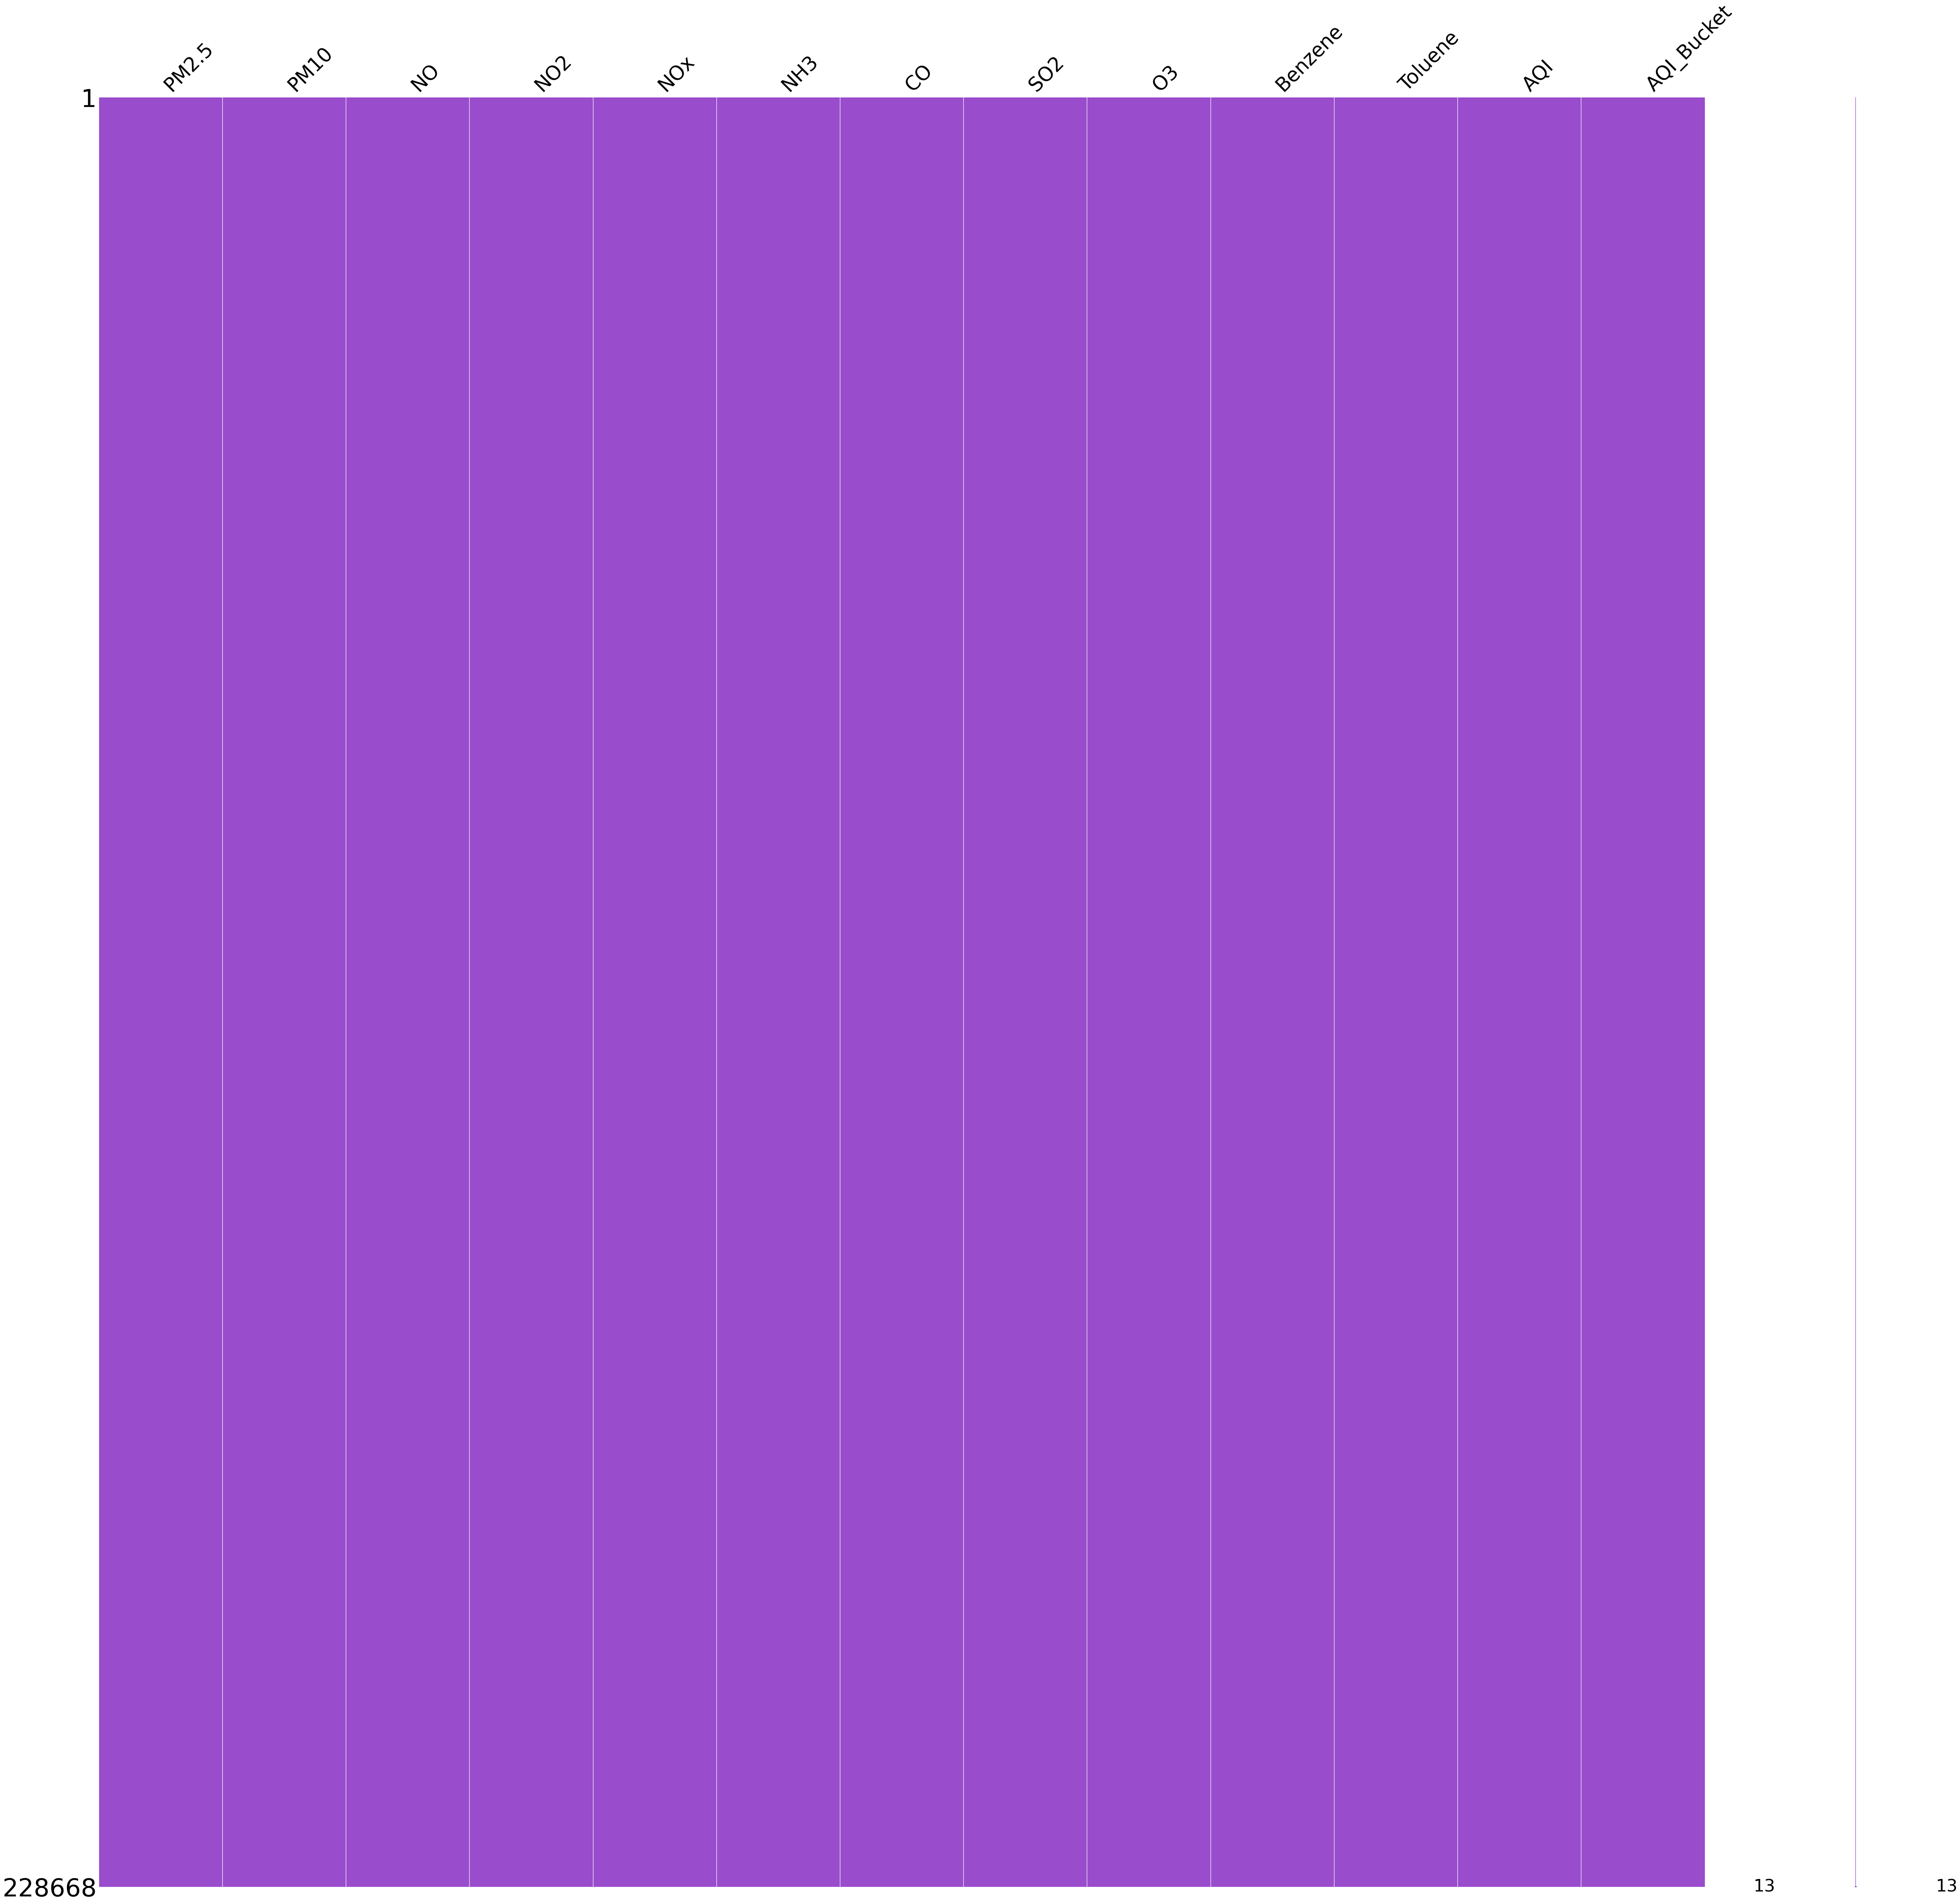

In [13]:
data=data.dropna()
data
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

In [14]:
X=data.iloc[:,2:-2]
y=data.iloc[:,-2]
X=np.array(X)
y=np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df[:10]

,Actual,Predicted
0,159.0,138.944454
1,437.0,315.538426
2,57.0,111.505978
3,47.0,88.070479
4,101.0,133.940895
5,110.0,152.570973
6,96.0,165.483066
7,347.0,264.195762
8,44.0,57.837169
9,319.0,125.927881


In [15]:
from sklearn.metrics import mean_squared_error 
y_pred=np.array(y_pred)
y_test=np.array(y_test)
# Calculation of Mean Squared Error (MSE) 
mse=mean_squared_error(y_pred,y_test) 
print(mse)

5372.830167439696


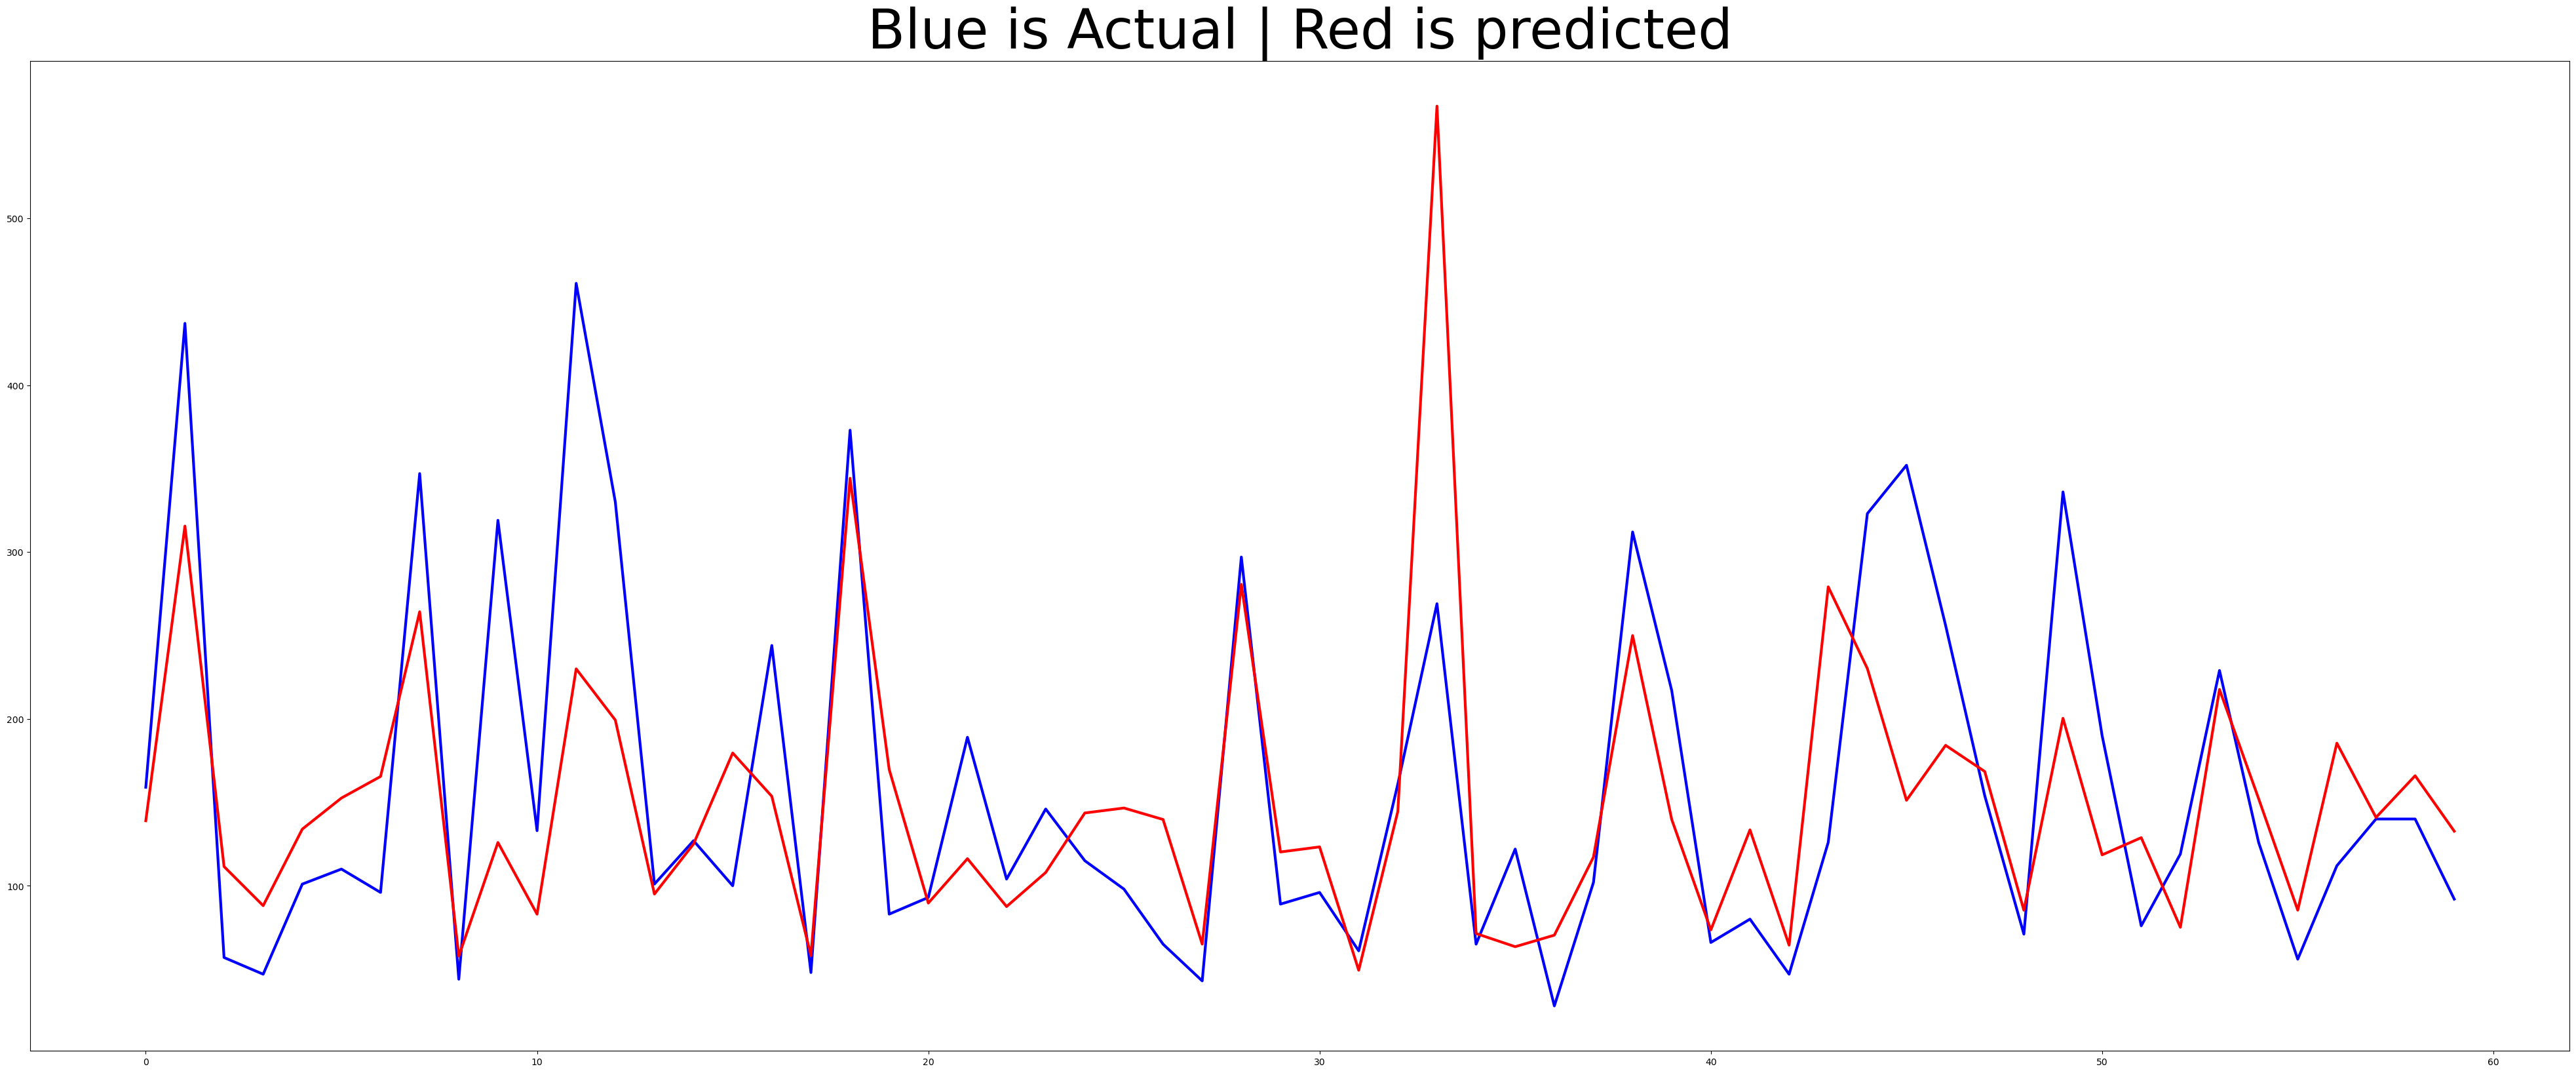

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20), dpi=100, facecolor='w', edgecolor='k')
plt.title("Blue is Actual | Red is predicted",size=60)
plt.plot(y_test[:60],'b', linewidth=3)
plt.plot(y_pred[:60],'r', linewidth=3)
plt.show()

# Missing values replaced with mean

In [17]:
data = pd.read_csv("city_hour.csv")
data=data.drop(columns=['Xylene','City','Datetime'])
data = data.fillna(data.mean())

<AxesSubplot:>

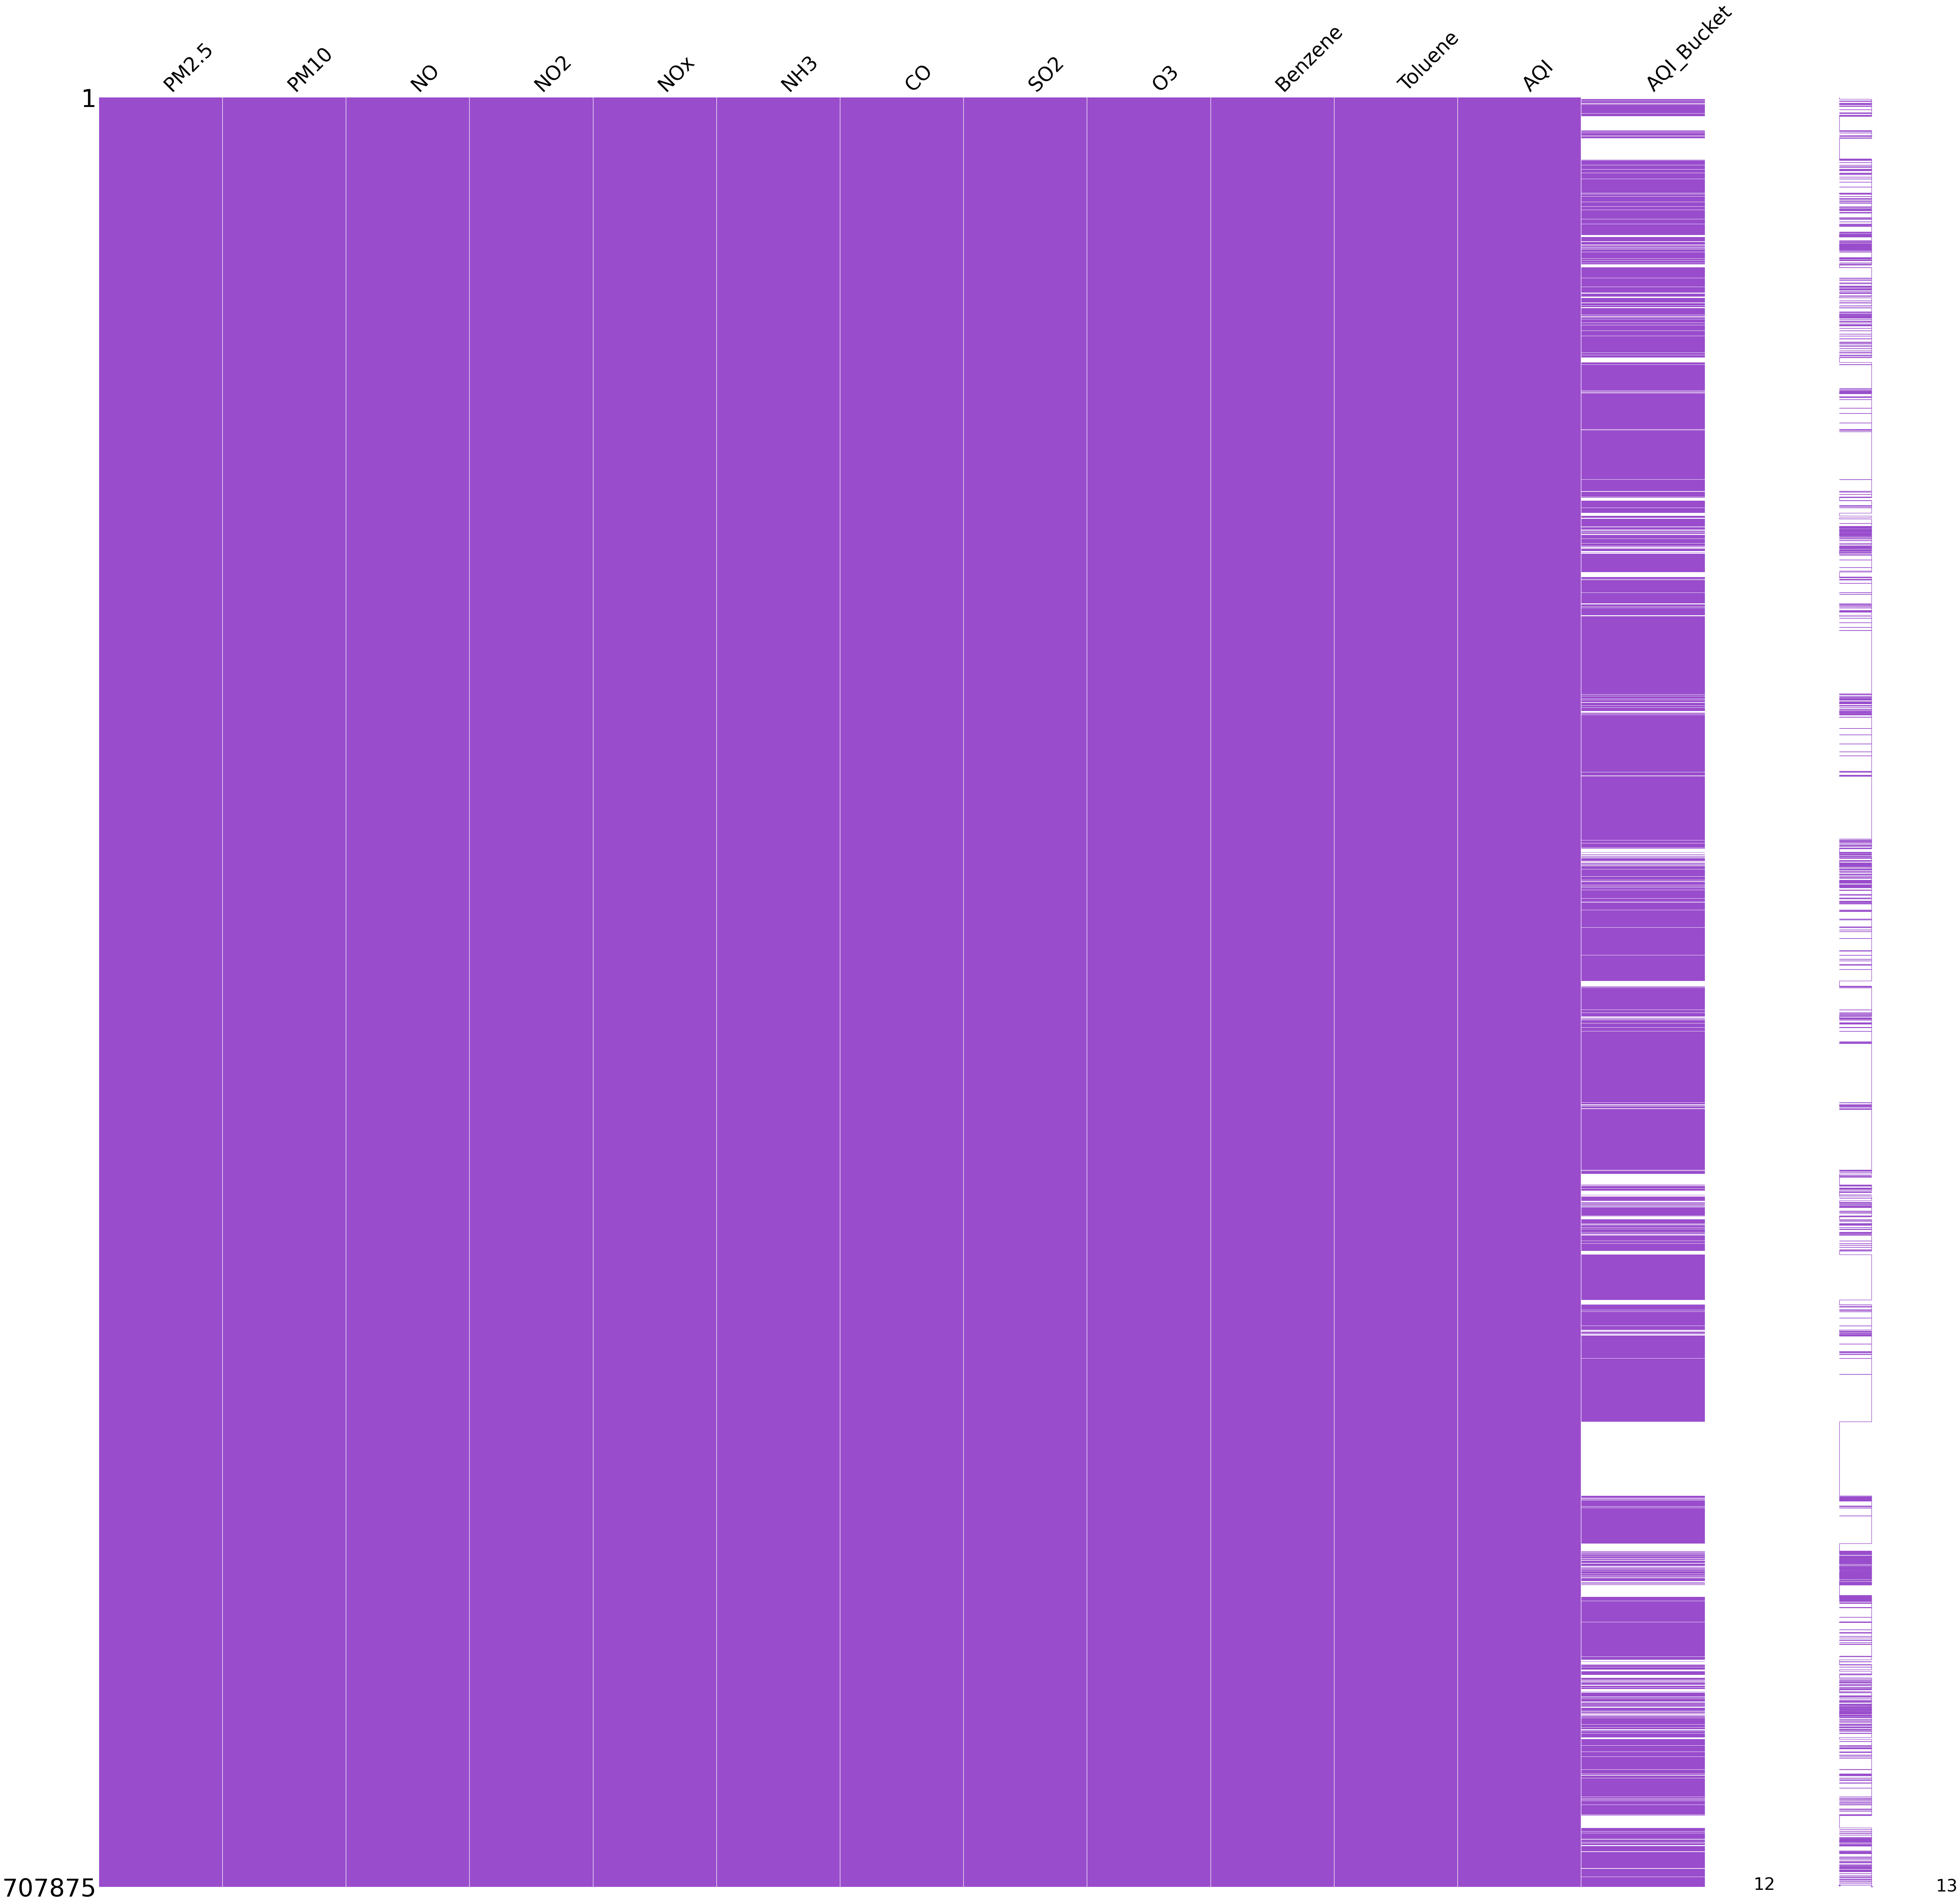

In [18]:
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

In [19]:
X=data.iloc[:,:-2]
y=data.iloc[:,-2]
X=np.array(X)
y=np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df[:10]

,Actual,Predicted
0,51.0000,57.943921
1,166.4135,149.383995
2,67.0000,112.398417
3,101.0000,69.958434
4,88.0000,139.817020
5,19.0000,44.244963
6,56.0000,134.199776
7,166.4135,271.533266
8,116.0000,203.028371
9,166.4135,92.023826


In [20]:
from sklearn.metrics import mean_squared_error 
y_pred=np.array(y_pred)
y_test=np.array(y_test)
# Calculation of Mean Squared Error (MSE) 
mse=mean_squared_error(y_pred,y_test) 
print(mse)

11608.052766371798


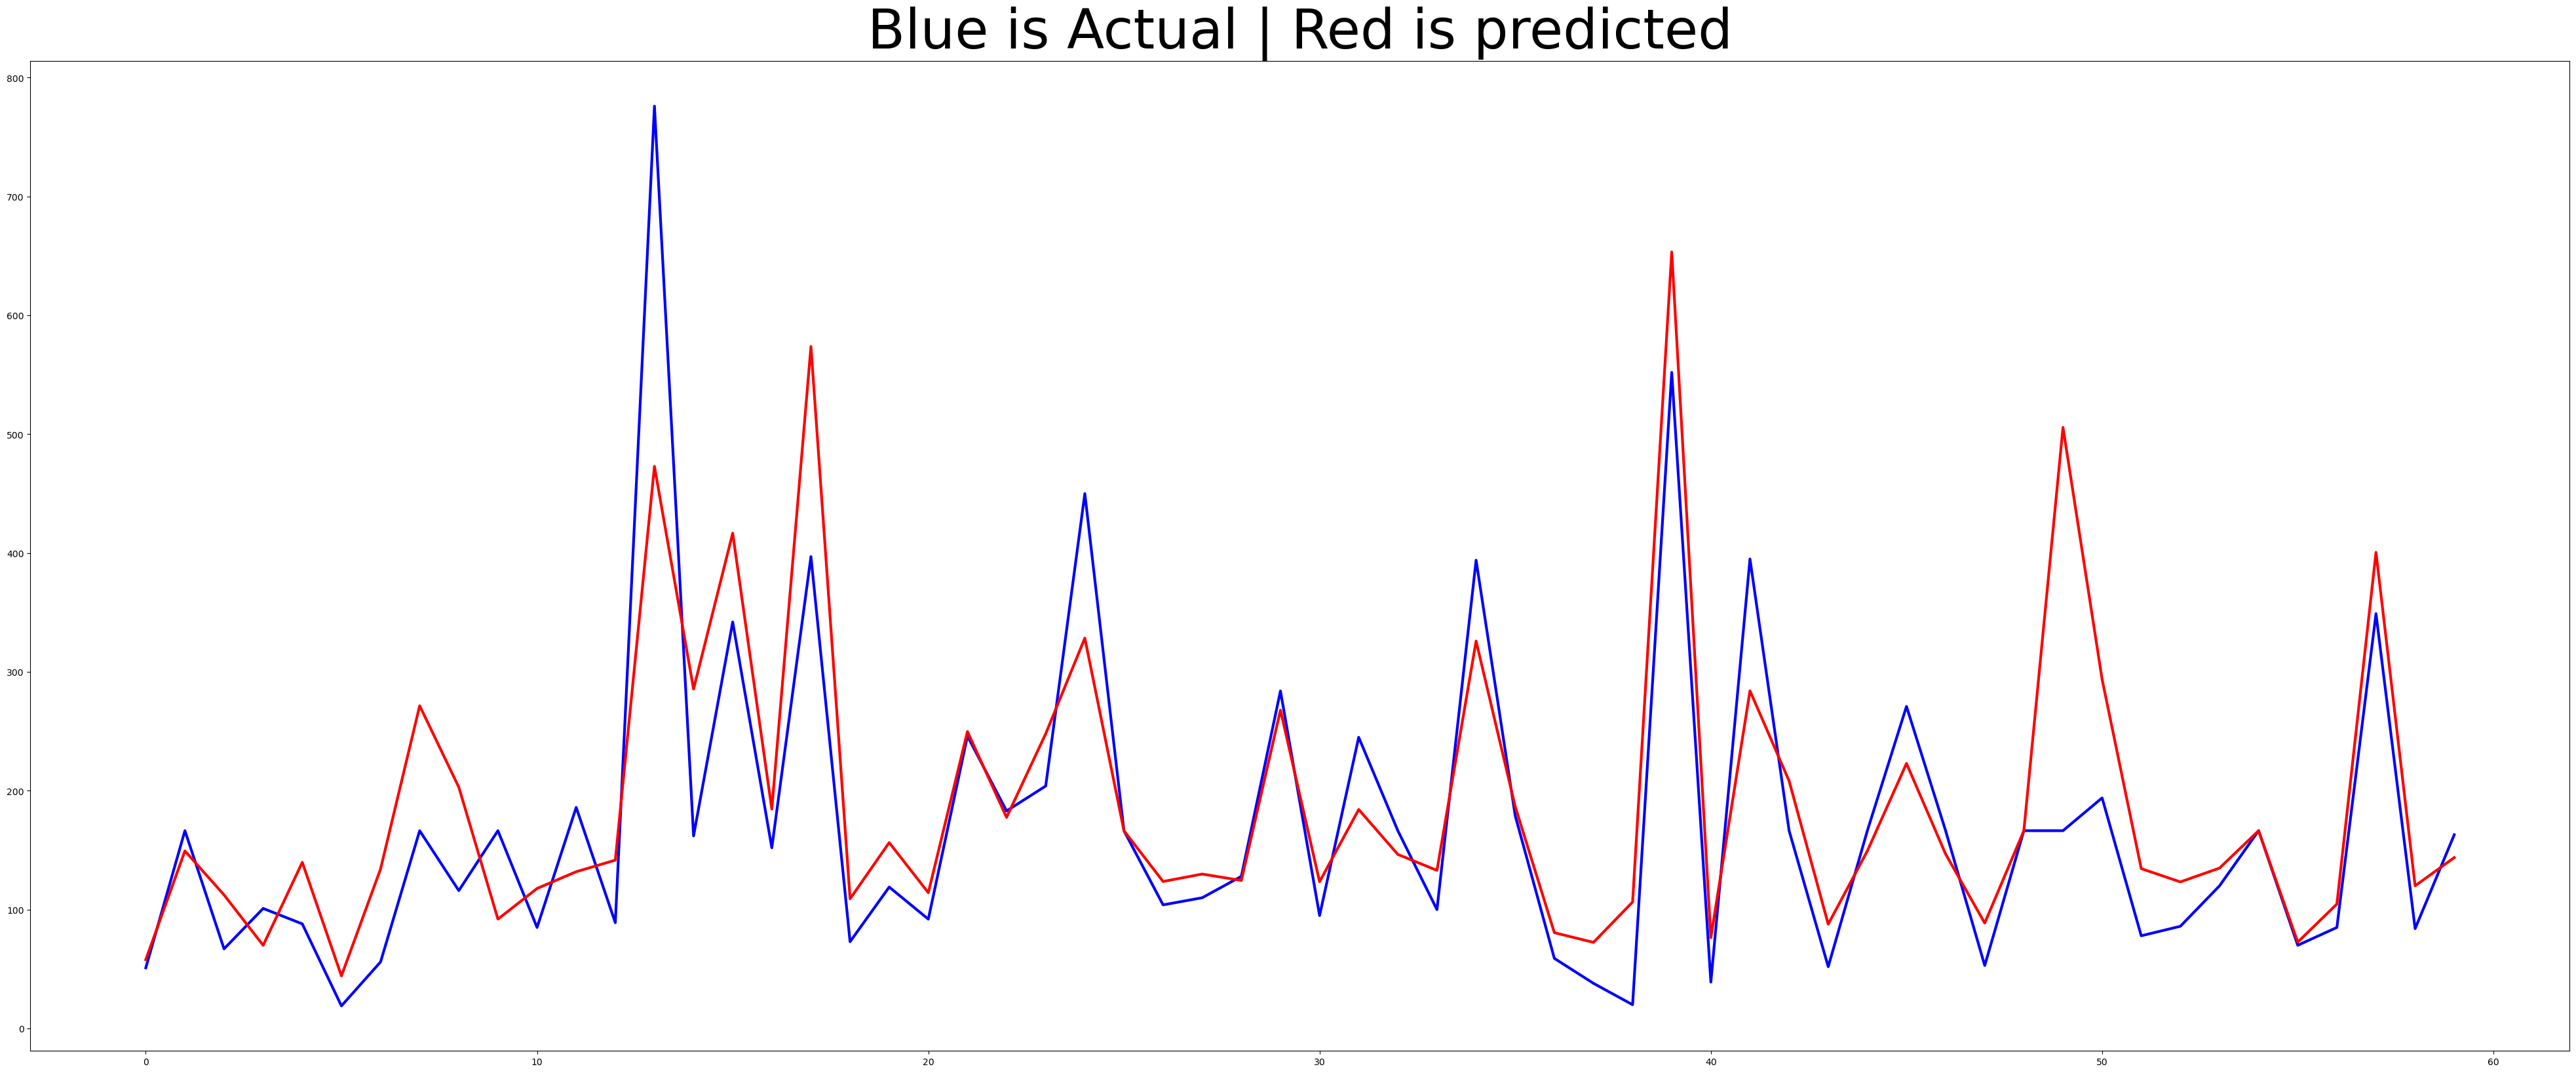

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20), dpi=100, facecolor='w', edgecolor='k')
plt.title("Blue is Actual | Red is predicted",size=60)
plt.plot(y_test[:60],'b', linewidth=3)
plt.plot(y_pred[:60],'r', linewidth=3)
plt.show()